In [2]:
import pandas as pd
import requests
import bs4
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
url = 'http://projects.fivethirtyeight.com/2015-nfl-predictions/'
res = requests.get(url)
soup = bs4.BeautifulSoup(res.text)
table = soup.find('tbody')

In [5]:
headers = ['Day','Away','Prob_Away','Prob_Home','Home','']
df = pd.DataFrame([[k.text for k in j.findAll('td')] for j in table.findAll('tr')],columns=headers).drop('',1)
df['Day'] = df['Day'].apply(lambda x: np.nan if x=='' else x).fillna(method='ffill')
df['Spread_Away'] = df['Prob_Away'].apply(lambda x: float(x.split('%')[-1]) if x.split('%')[-1]!='' else 0)
df['Spread_Home'] = df['Prob_Home'].apply(lambda x: float(x.split('%')[-1]) if x.split('%')[-1]!='' else 0)
df['Prob_Away'] = df['Prob_Away'].apply(lambda x: int(x.split('%')[0])/100)
df['Prob_Home'] = df['Prob_Home'].apply(lambda x: int(x.split('%')[0])/100)
df.ix[df['Spread_Away']==0,'Spread_Away'] = df.ix[df['Spread_Away']==0,'Spread_Home']*-1
df.ix[df['Spread_Home']==0,'Spread_Home'] = df.ix[df['Spread_Home']==0,'Spread_Away']*-1

In [6]:
url = 'http://www.foxsports.com/nfl/odds'
res = requests.get(url)
soup = bs4.BeautifulSoup(res.text)
headers = ['Away','Home','Home_Mkt_Spread']
df_mkt = pd.DataFrame([[k.find('td',class_='wisfb_teamsCol').contents[0],k.find('td',class_='wisfb_teamsCol').contents[2],float(k.find('td',class_='wisfb_runLinePtsCol').contents[-1])] for k in [j.findAll('tr')[0] for j in soup.findAll('tbody')]],columns=headers)
df_mkt['Away_Mkt_Spread'] = df_mkt['Home_Mkt_Spread']*-1

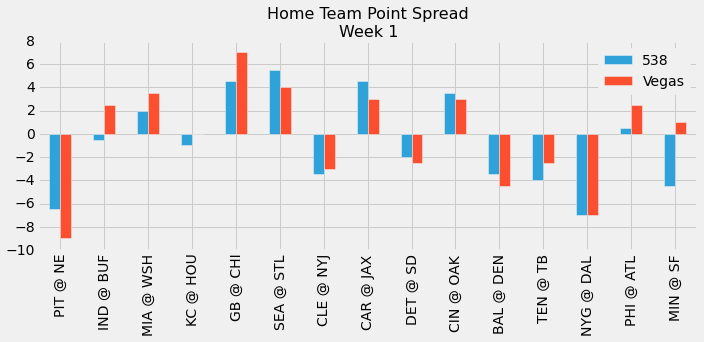

In [7]:
df = df.merge(df_mkt)
df['Game'] = df['Away'] + ' @ ' + df['Home']
df.set_index('Game')[['Spread_Home','Home_Mkt_Spread']].plot(kind='bar',figsize=(10,5))
plt.title('Home Team Point Spread\nWeek 1',fontsize=16)
plt.legend(['538','Vegas'],fontsize=14)
plt.xlabel('')
plt.tight_layout()

In [8]:
df

,Day,Away,Prob_Away,Prob_Home,Home,Spread_Away,Spread_Home,Home_Mkt_Spread,Away_Mkt_Spread,Game
0,Thurs,PIT,0.28,0.72,NE,6.5,-6.5,-9.0,9.0,PIT @ NE
1,Sun,IND,0.47,0.52,BUF,0.5,-0.5,2.5,-2.5,IND @ BUF
2,Sun,MIA,0.57,0.43,WSH,-2.0,2.0,3.5,-3.5,MIA @ WSH
3,Sun,KC,0.46,0.54,HOU,1.0,-1.0,0.0,-0.0,KC @ HOU
4,Sun,GB,0.66,0.34,CHI,-4.5,4.5,7.0,-7.0,GB @ CHI
5,Sun,SEA,0.69,0.31,STL,-5.5,5.5,4.0,-4.0,SEA @ STL
6,Sun,CLE,0.38,0.62,NYJ,3.5,-3.5,-3.0,3.0,CLE @ NYJ
7,Sun,CAR,0.66,0.34,JAX,-4.5,4.5,3.0,-3.0,CAR @ JAX
8,Sun,DET,0.43,0.57,SD,2.0,-2.0,-2.5,2.5,DET @ SD
9,Sun,CIN,0.62,0.38,OAK,-3.5,3.5,3.0,-3.0,CIN @ OAK
